# 以为序列的 dtw 相似度计算
这个函数保留了一个紧致矩阵，而不是完整的弯曲路径矩阵。
使用动态规划计算

该distance函数具有线性空间复杂度，但具有二次时间复杂度。为了降低时间复杂度，有许多选项可用。在 DTW 实现中最常用的方法是使用一个窗口来指示允许的最大偏移（也称为 Sakoe-Chiba 频带）。这降低了窗口大小和最大序列长度乘积的复杂性：

In [95]:
# 仅仅计算两条序列的距离
from dtaidistance import dtw
import numpy as np
import pandas as pd
"""
dtw.distance()

s1 s2 的类型：
    <class 'list'>
    <class 'numpy.ndarray'>
    <class 'pandas.core.series.Series'>

paras:
    s1: first sequence
    s2: Second sequence
            # window: 只允许两个对角线的最大位移小于这个数字。它包括对角线，这意味着通过设置window=1获得欧氏距离。
    max_dist: 如果返回值大于此值，则停止，避免计算大于该值的部分路径。如果没有找到小于或等于该值的解，则返回无穷大。
            # max_step: Do not allow steps larger than this value
    max_length_diff:如果两个序列的长度更大，则返回无穷大
            # penalty:施加压缩或膨胀时增加的惩罚
    psi: psi松弛参数(忽略匹配的起始和结束)。
        如果psi是一个整数，它被用于两个级数的开始和结束松弛。
        如果psi是一个4元组，它被用作的psi松弛
        (begin series1, end series1, begin series2, end series2)
        对循环级数很有用。
    use_c:使用快速纯c编译函数
            # use_pruning:基于欧几里得距离修剪值。这与将ub_euclidean()传递给max_dist是一样的
            # only_ub:只计算上界(欧几里得)。
    use_ndim: The input series is >1 dimensions. Use cost = EuclideanDistance(s1[i], s2[j]) 如果序列的纬度大于1，使用欧式距离！！！
Returns:
    DTW distance
"""
# print(dtw.distance.__doc__)  # 查看函数说明
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1]

distance_list = dtw.distance(s1, s2,  max_dist=3, max_length_diff=3)
print(type(s1))
print(distance_list)


s3 = np.array(s1)
s4 = np.array(s2)
distance_array = dtw.distance(s3, s4 )
print(type(s3))
print(distance_array)


s5 = pd.DataFrame(data=[0, 0, 1, 2, 1, 0, 1, 0, 0], columns=['data'])
s6 = pd.DataFrame(data=[0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1], columns=['data'])
print(type(s5['data']))
dp_distance = dtw.distance(s5['data'], s6['data'])
print(dp_distance)

<class 'list'>
1.7320508075688772
<class 'numpy.ndarray'>
1.7320508075688772
<class 'pandas.core.series.Series'>
1.7320508075688772


# DTW 并保留所有翘曲路径

In [96]:
# 如果在距离旁边，您还希望完整矩阵查看所有可能的变形路径（也称为累积成本矩阵）：
from dtaidistance import dtw
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance, paths = dtw.warping_paths(s1, s2)
print(distance)
print(paths)

1.4142135623730951
[[0.                inf        inf        inf        inf        inf
         inf        inf        inf        inf]
 [       inf 0.         1.         2.23606798 2.23606798 2.23606798
  2.23606798 2.23606798 2.23606798 2.23606798]
 [       inf 0.         1.         2.23606798 2.23606798 2.23606798
  2.23606798 2.23606798 2.23606798 2.23606798]
 [       inf 1.         0.         1.         1.41421356 1.73205081
  2.         2.23606798 2.44948974 2.44948974]
 [       inf 2.23606798 1.         0.         2.         2.44948974
  2.64575131 2.82842712 3.         3.16227766]
 [       inf 2.44948974 1.         1.         1.         1.41421356
  1.73205081 2.         2.23606798 2.44948974]
 [       inf 2.44948974 1.41421356 2.23606798 1.         1.
  1.         1.         1.         1.        ]
 [       inf 2.64575131 1.41421356 1.73205081 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356]
 [       inf 2.64575131 1.73205081 2.44948974 1.41421356 1.41421356
 

[(0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12), (11, 13), (12, 14), (13, 15), (14, 16), (14, 17), (15, 18), (16, 18), (17, 19), (18, 20), (19, 21), (20, 22), (21, 23), (22, 24), (23, 25), (24, 26), (25, 27), (26, 28), (27, 29), (28, 30), (29, 31), (30, 32), (31, 33), (32, 34), (33, 35), (34, 36), (35, 37), (36, 38), (37, 39)]


'\nPlot the warping paths matrix.\n   :param s1: Series 1\n   :param s2: Series 2\n   :param paths: Warping paths matrix\n   :param path: Path to draw (typically this is the best path)\n   :param filename: Filename for the image (optional)  图像的文件名(可选)\n   :param shownumbers: Show distances also as numbers  用数字表示距离\n   :param showlegend: Show colormap legend  显示colormap 小图表\n   :param figure: Matplotlib Figure object\n   :return: Figure, Axes\n'

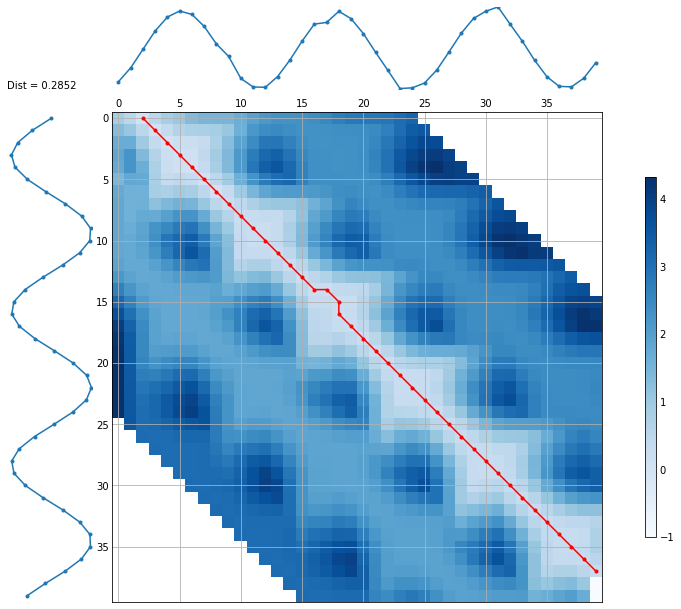

In [117]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
x = np.arange(0, 20, .5)
s1 = np.sin(x)  # 创建 sin 序列数据
s2 = np.sin(x - 1)  # 创建 cos 序列数据
random.seed(1)  # 创建随机种子
for idx in range(len(s2)):  # 做循环为数据做 波动处理！！！！
    if random.random() < 0.05:  # 设置波动的数据范围字 0.05 以内！！！
        s2[idx] += (random.random() - 0.5) / 2

d, paths = dtw.warping_paths(s1, s2, window=25, psi=5)  # psi 松弛因子 就是可以让两组序列之间的比较，开始和结束允许 省略点，从而找到最符合的数据对！！！！
"""
warping_paths 函数
返回：
    (DTW distance, DTW matrix)
        DTW matrix 扭曲的路径矩阵
        DTW distance 最好路径距离
"""



best_path = dtw.best_path(paths)
print(best_path)
# best_path_3 = dtw.best_path(paths, col=10, row=10)
# print(best_path_3)
"""
dtw.best_path()
参数：
    path - 路径
    row – 如果给定，则从该行开始（而不是右下角） 右下角最大！！
    col - 如果给定，则从该列开始（而不是右下角） 右下角最大！！
返回:
    根据 n*m 弯曲路径矩阵，计算最优路径。
    数组[ (row, col),...,(row n, col m)] 表示最佳路径点。
返回：最佳路线。
best_path = [(0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11),
 (10, 12), (11, 13), (12, 14), (13, 15), (14, 16), (14, 17), (15, 18), (16, 18),
 (17, 19), (18, 20), (19, 21), (20, 22), (21, 23), (22, 24), (23, 25), (24, 26),
 (25, 27), (26, 28), (27, 29), (28, 30), (29, 31), (30, 32), (31, 33), (32, 34),
 (33, 35), (34, 36), (35, 37), (36, 38), (37, 39)]

 psi=5, 最多允许5个点的伸缩范围！
    s1序列 从0点到37点，一共38个匹配点
    s2序列 从2点到39点，一共38个匹配调
"""


dtwvis.plot_warpingpaths(s1, s2, paths, best_path, showlegend=True)
"""
Plot the warping paths matrix.
   :param s1: Series 1
   :param s2: Series 2
   :param paths: Warping paths matrix
   :param path: Path to draw (typically this is the best path)
   :param filename: Filename for the image (optional)  图像的文件名(可选)
   :param shownumbers: Show distances also as numbers  用数字表示距离
   :param showlegend: Show colormap legend  显示colormap 小图表
   :param figure: Matplotlib Figure object
   :return: Figure, Axes
"""

# 注意psi在开始和结束时放松匹配的参数。在此示例中，即使正弦波略有偏移，这也会导致完美匹配

# 比较两个多维度序列

In [98]:
from dtaidistance import dtw_ndim

series1 = np.array([[0, 0],  # first 2-dim point at t=0
                    [0, 1],  # second 2-dim point at t=1
                    [2, 1],
                    [0, 1],
                    [0, 0]], dtype=np.double)
series2 = np.array([[0, 0],
                    [2, 1],
                    [0, 1],
                    [0, .5],
                    [0, 0]], dtype=np.double)
d = dtw_ndim.distance(series1, series2)
print(d)

1.118033988749895


# 子序列搜索是匹配较长序列中短时间序列的最佳出现。

![长序列](./给定一个长序列.png)

![查询](./查询子序列.png)

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

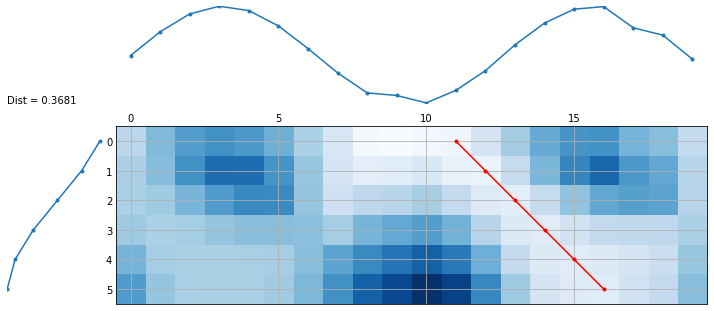

In [108]:
import random
import numpy as np
x_series = np.arange(0, 10, .5)
series = np.sin(x_series)  # 创建 sin 序列数据
x_query = np.arange(0, 3, .5)
query = np.sin(x_query - 1)  # 创建 cos 序列数据
random.seed(1)  # 创建随机种子
for idx in range(len(series)):  # 做循环为数据做 波动处理！！！！
    if random.random() < 0.05:  # 设置波动的数据范围字 0.05 以内！！！
        series[idx] += (random.random() - 0.5) / 2



# 可以找到最好的出现如下：
from dtaidistance.subsequence.dtw import subsequence_alignment
from dtaidistance import dtw_visualisation as dtwvis
sa = subsequence_alignment(query, series)
match = sa.best_match()
startidx, endidx = match.segment
dtwvis.plot_warpingpaths(query, series, sa.warping_paths(), match.path)

![](./匹配的结果.png)

![](./最优序列比较.png)

# 如果要查找所有匹配项（或 k 个最佳匹配项）：

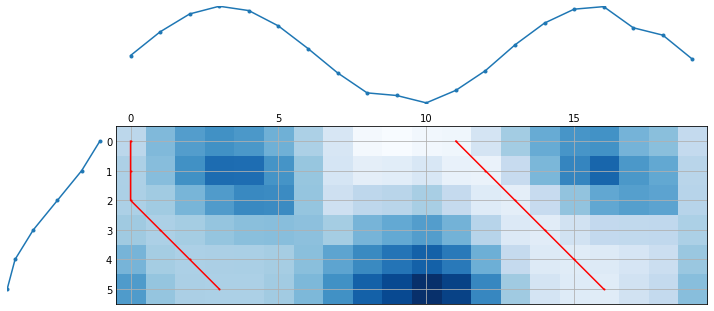

In [100]:
fig, ax = dtwvis.plot_warpingpaths(query, series, sa.warping_paths(), path=-1)
for kmatch in sa.kbest_matches(9):
    dtwvis.plot_warpingpaths_addpath(ax, kmatch.path)

# 下面是 自己数据 对于 子序列的匹对

<Figure size 144x144 with 0 Axes>

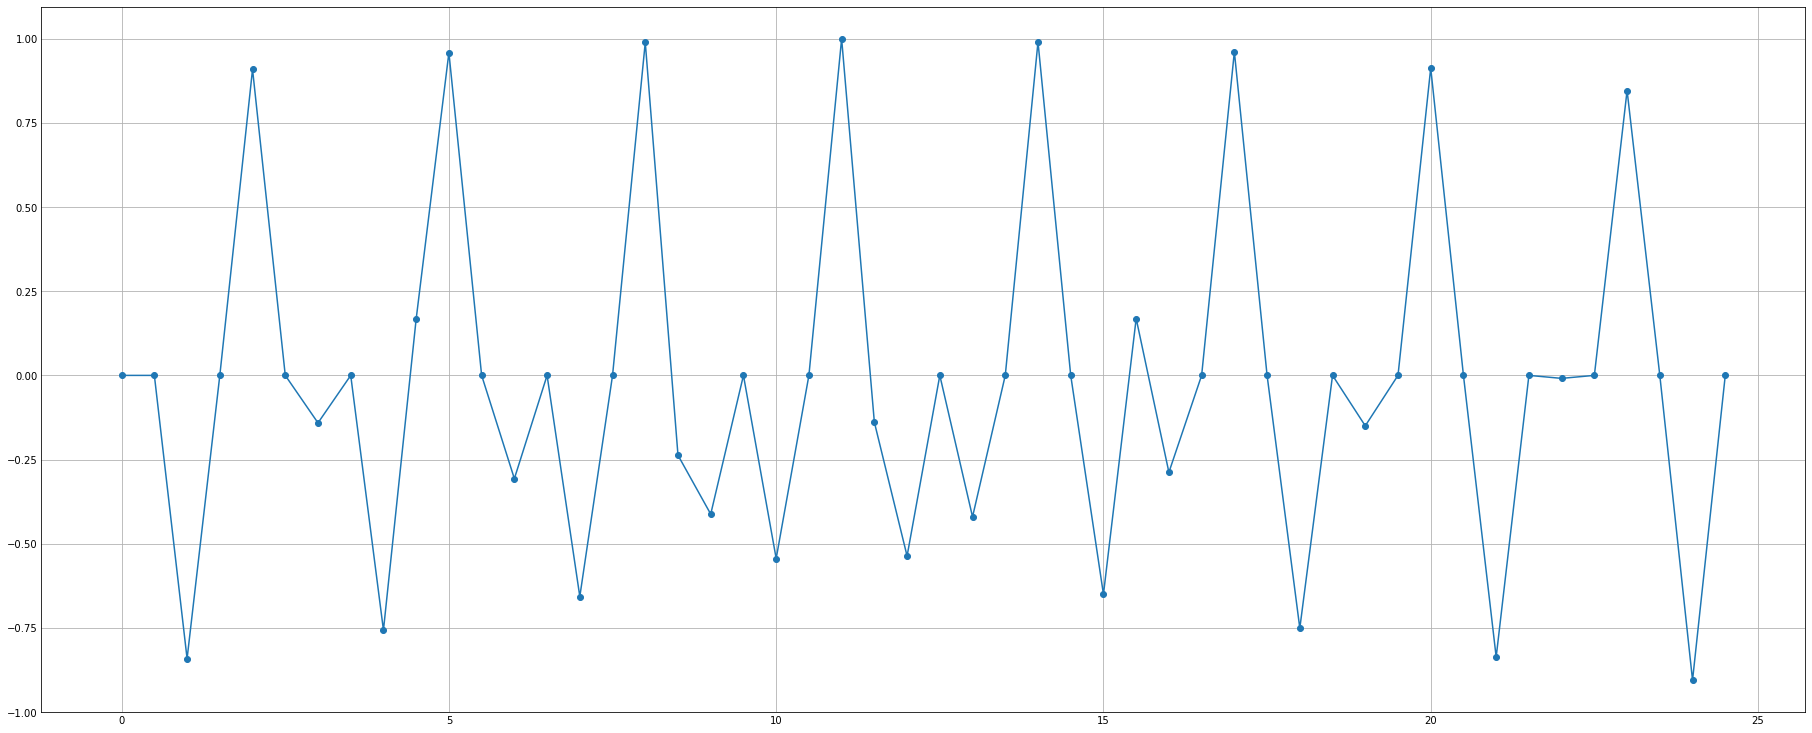

In [101]:

import numpy as np
import matplotlib.pyplot as plt

# 产生随机点
x_series = np.arange(0, 25, 0.5)
# y = np.cos(2*x_series) + np.sin(3*x_series)  # 这个函数也行！
y_series = (np.sin(x_series)) * (np.cos(np.pi * x_series))
random.seed(1)  # 创建随机种子
for idx in range(len(y_series)):  # 做循环为数据做 波动处理！！！！
    if random.random() < 0.05:  # 设置波动的数据范围字 0.05 以内！！！
        y_series[idx] += (random.random() - 0.5) / 2

# 绘制随机点 scatter 和 曲线图 plot
# plt.rcParams['axes.facecolor']='white'  # 设置matplotlib的默认配置文件
fig = plt.figure()
plt.figure(figsize=(25, 10))  #8，5分别对应宽和高
plt.scatter(x_series, y_series)  # 绘制散点
plt.plot(x_series, y_series)  # 绘制拟合曲线

plt.show()

<Figure size 144x144 with 0 Axes>

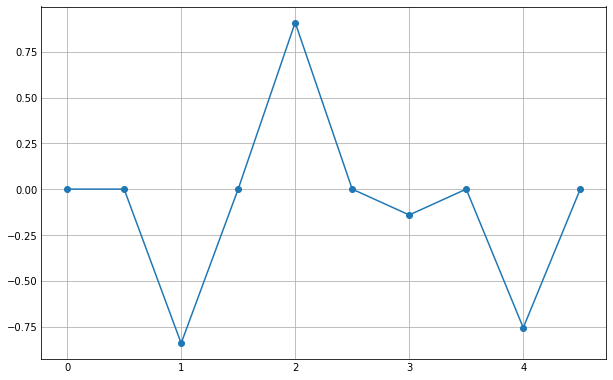

In [124]:
x_query = np.arange(0, 5, .5)
y_query = (np.sin(x_query))*(np.cos(np.pi*x_query))
fig = plt.figure()
plt.figure(figsize=(8, 5))#8，5分别对应宽和高
plt.scatter(x_query, y_query)  # 绘制散点
plt.plot(x_query, y_query)  # 绘制拟合曲线

plt.show()

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]
0.016788255195993484
[0, 9]
[(0, 41), (1, 41), (2, 42), (3, 43), (3, 44), (3, 45), (4, 46), (5, 47), (6, 47), (7, 47), (8, 48), (9, 49)]
0.031004734994689042
[41, 49]
[(0, 19), (1, 19), (2, 20), (3, 21), (4, 22), (5, 23), (6, 23), (7, 23), (8, 24), (9, 25)]
0.04625303269537942
[19, 25]
[(0, 29), (1, 29), (2, 30), (3, 31), (3, 32), (3, 33), (4, 34), (5, 35), (6, 35), (7, 35), (8, 36), (9, 37)]
0.04696723618943212
[29, 37]
[(0, 13), (1, 13), (2, 14), (3, 15), (4, 16), (5, 17), (6, 17), (7, 17), (8, 18), (9, 19)]
0.05577618544344901
[13, 19]
[(0, 25), (1, 25), (2, 26), (3, 27), (4, 28), (5, 29), (6, 29), (7, 29), (8, 29), (9, 29)]
0.09092706938510824
[25, 29]


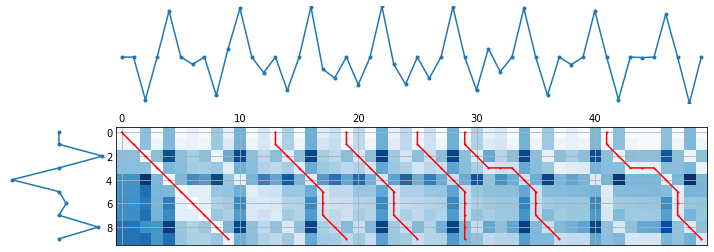

In [123]:
from dtaidistance.subsequence.dtw import subsequence_alignment
from dtaidistance import dtw_visualisation as dtwvis
sa = subsequence_alignment(y_query, y_series)

fig, ax = dtwvis.plot_warpingpaths(y_query, y_series, sa.warping_paths(), path=-1)
for kmatch in sa.kbest_matches(9):
    print(kmatch.path)  # 对应点之间的值
    print(kmatch.value)  # 两段序列之间的值
    print(kmatch.segment)  # 哪一段序列是匹配的
    dtwvis.plot_warpingpaths_addpath(ax, kmatch.path)


(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

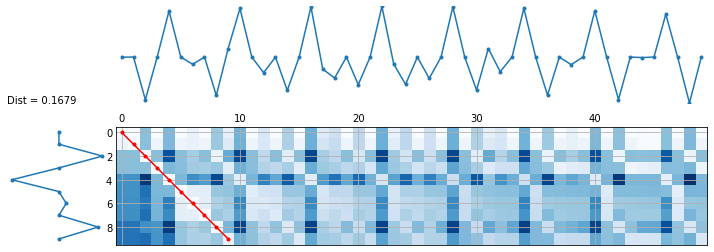

In [107]:
from dtaidistance.subsequence.dtw import subsequence_alignment
from dtaidistance import dtw_visualisation as dtwvis

sa = subsequence_alignment(y_query, y_series)
match = sa.best_match()
startidx, endidx = match.segment
dtwvis.plot_warpingpaths(y_query, y_series, sa.warping_paths(), match.path)

# 针对不同的 标准动作，统计一下动作平均时长，从而使用不同的时长窗口？
比如针对，左横滚、有横滚 机动时间短，窗口设置为：20~25个数据点

针对斤斗，采用30~40个点